### Lib

In [1]:
from catboost import CatBoostRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


### Simple Data Regressor

In [2]:
data = make_regression(n_samples=1000,n_features=2,n_targets=1,bias=5,noise=10,shuffle=True,random_state=1)
X,y = data

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=380)

In [4]:
Model = CatBoostRegressor(iterations=200, learning_rate=0.05, depth=6, eval_metric='MAE', verbose=10,
                          task_type='GPU', save_snapshot=True, snapshot_file='SaveModel', snapshot_interval=60)
Model.fit(X_train, y_train, eval_set=(X_test, y_test))

bestTest = 8.424972656
bestIteration = 180
Shrink model to first 181 iterations.


In [5]:
Model.score(X_test,y_test)

0.9852085714892268

### Plot 

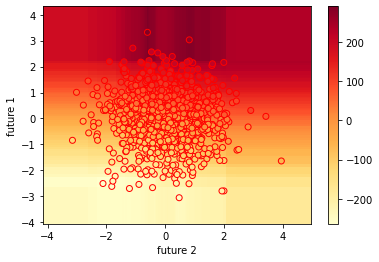

In [6]:
h=0.01
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = Model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.pcolormesh(xx,yy,Z,cmap=plt.cm.YlOrRd)
plt.ylabel('future 1')
plt.xlabel('future 2')

plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.YlOrRd,edgecolors="r")
plt.ylabel('future 1')
plt.xlabel('future 2')
plt.colorbar()

### Real Data Regressor

In [7]:
data = pd.read_csv('kc_house_data.csv')
X = data.iloc[:, 3:].values
y = data['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y)
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
Model = CatBoostRegressor(iterations=200, learning_rate=0.05, depth=6, eval_metric='MAE', verbose=10,
                          task_type='GPU', save_snapshot=True, snapshot_file='SaveModel1', snapshot_interval=60)
Model.fit(X_train, y_train, eval_set=(X_test, y_test))

0:	learn: 224867.8793263	test: 230616.7994078	best: 230616.7994078 (0)	total: 14ms	remaining: 2.79s
10:	learn: 166094.7552594	test: 169979.3930422	best: 169979.3930422 (10)	total: 142ms	remaining: 2.44s
20:	learn: 130767.1185144	test: 133591.0466321	best: 133591.0466321 (20)	total: 263ms	remaining: 2.24s
30:	learn: 110073.5719662	test: 112679.4611399	best: 112679.4611399 (30)	total: 377ms	remaining: 2.06s
40:	learn: 97572.5071257	test: 100234.9430052	best: 100234.9430052 (40)	total: 507ms	remaining: 1.97s
50:	learn: 89866.5343945	test: 92662.2531458	best: 92662.2531458 (50)	total: 623ms	remaining: 1.82s
60:	learn: 84919.2226541	test: 87989.9037750	best: 87989.9037750 (60)	total: 747ms	remaining: 1.7s
70:	learn: 81369.6055278	test: 84515.4344930	best: 84515.4344930 (70)	total: 861ms	remaining: 1.56s
80:	learn: 79041.3464125	test: 82250.2620281	best: 82250.2620281 (80)	total: 984ms	remaining: 1.45s
90:	learn: 77346.6355728	test: 80595.3871207	best: 80595.3871207 (90)	total: 1.1s	remainin

In [9]:
Model.score(X_test,y_test)

0.8787237638470714